### SVM in sklearn Hard and Soft Margin 

In [188]:
#  Copyright private in 2018 
#  Modify Date: 
#      2018-9-19
#  Purpose : 
#      SVM learning 
# 
# ----------
#coding:utf-8
# import model or lib
import numpy as np
import matplotlib.pyplot as plt
from  sklearn import datasets



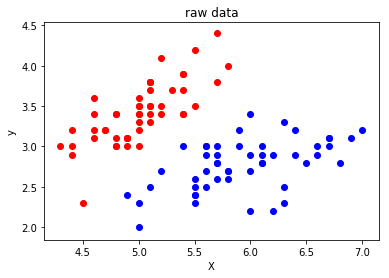

In [159]:
# 1 Data sets preparation 
iris = datasets.load_iris()

X = iris.data
y = iris.target

# y = 0,1 表示二分类问题   :2 表示取前两个特征
X = X[y<2,:2]
y = y[y<2]

# plot show 
# plt.figure(figsize = (6,3))
plt.scatter(X[y == 0,0], X[y == 0,1],color = 'r')
plt.scatter(X[y == 1,0], X[y == 1,1],color = 'b')
plt.title("raw data")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [160]:
# 2 跟KNN算法一样，先数据标准化以消除数据尺度对决策边界的影响
from sklearn.preprocessing import StandardScaler

standardScaler= StandardScaler()  # 数据标准化处理
standardScaler.fit(X)
X_standard = standardScaler.transform(X)  # transform(X)



### 1. Set C value to big: 1e6

In [161]:
# fit the datasets - 线性SVM
# set C value to big value 1e3
from sklearn.svm import LinearSVC

#  C = 1e6 越大越偏向于hard margin SVM　容错空间更小
svc = LinearSVC(C=1e6)
svc.fit(X_standard,y)

LinearSVC(C=1000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [162]:
# 3 plot the decision boundary
def plot_decision_bounary(model, axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1], int( (axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3], int( (axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    x_new          =   np.c_[x0.ravel(), x1.ravel()]
    y_prediction   =   model.predict(x_new)
    y_prediction   =   y_prediction.reshape(x0.shape)
    
    
    from matplotlib.colors import ListedColormap
    custom_map  = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0,x1,y_prediction, linewidth= 2, cmap = custom_map)
    

c:\users\h155809\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


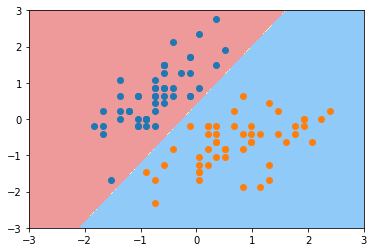

In [163]:
# call plot_decision_bounary to show the boundary 
plot_decision_bounary(svc,axis = [-3,3,-3,3])

plt.scatter(X_standard[y ==0,0], X_standard[y == 0,1])
plt.scatter(X_standard[y ==1,0], X_standard[y == 1,1])
plt.show()

## 分析：
# C 很大时，相当于hard margin SVM

### 2.Set C value to small: 1e-2

In [174]:
# C 变小成为soft margin SVM, 允许容错空间更大，下图中的蓝色点被错误分成了红色区域 
from sklearn.svm import LinearSVC
svc001  = LinearSVC(C=1e-2)
svc001.fit(X_standard,y)


LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

c:\users\h155809\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


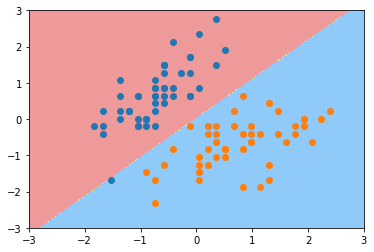

In [175]:
plot_decision_bounary(svc001,axis = [-3,3,-3,3])
plt.scatter(X_standard[y ==0,0], X_standard[y == 0,1])
plt.scatter(X_standard[y ==1,0], X_standard[y == 1,1])
plt.show()

In [173]:
# 
svc001.coef_
# 


array([[ 0.11775397, -0.1101242 ]])

In [172]:
svc001.intercept_

array([-2.4916194e-09])

### 3.二分类问题 

In [166]:
# decision boundary - 权重 w[0], w[1]
# w[0] = svc.coef_[0][0]
# w[1] = svc.coef_[0][1]
# b  = svc.intercept_
# 
svc.coef_

array([[ 4.03241   , -2.49294424]])

In [167]:
svc.coef_[0][1]

-2.492944237075333

In [168]:

svc.intercept_[0]

0.9536413374601439

### 3.1 依赖上述coef_ 值和 intercept_  值画出 容错边界

In [169]:
# 
def plot_decision_bounary_softmargin(model, axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1], int( (axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3], int( (axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    x_new          =   np.c_[x0.ravel(), x1.ravel()]
    y_prediction   =   model.predict(x_new)
    y_prediction   =   y_prediction.reshape(x0.shape)
    
    
    from matplotlib.colors import ListedColormap
    custom_map  = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0,x1,y_prediction, linewidth= 2, cmap = custom_map)
    
    w0 = model.coef_[0][0]
    w1 = model.coef_[0][1]
    b  = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => : x1 = - b/w1 - (w0/w1)*x0 
    
    # softmargin line1：w0*x0 + w1*x1 + b =  1
    # =>: x1 = - b/w1 - (w0/w1)*x0 + 1/w1
     
    # softmargin line2: w0*x0 + w1*x1 + b = -1
    # =>: x1 = - b/w1 - (w0/w1)*x0 - 1/w1
    
    # 一元线性方程
    # mark x0 = x, x1 = y 
    # Ax + By + C = 0 
    
    # plot the figure 
    plot_x        = np.linspace(axis[0],axis[1],200)
    plot_y_up     = -(w0/w1)*plot_x +  (1 - b)/w1
    plot_y_down   = -(w0/w1)*plot_x +  (-1 - b)/w1
    
    # 控制y的显示范围
    y_upindex =  (plot_y_up >= axis[2]) & (plot_y_up <= axis[3])
    y_downindex= (plot_y_down>=axis[2]) & (plot_y_down<= axis[3])
    
    plt.plot(plot_x[y_upindex],plot_y_up[y_upindex],      linewidth = 2, color = 'red')
    plt.plot(plot_x[y_downindex],plot_y_down[y_downindex],linewidth = 2,color = 'blue')
    
    

### 3.2 画出冗错边界

c:\users\h155809\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


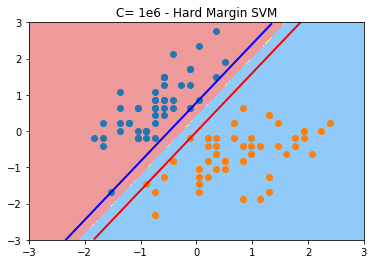

In [177]:
# SVC , C = 1e6 - Hard margin SVM 
plot_decision_bounary_softmargin(svc, axis =[-3,3,-3,3])
plt.scatter(X_standard[y == 0,0],X_standard[y == 0,1])
plt.scatter(X_standard[y == 1,0],X_standard[y == 1,1])
plt.title('C= 1e6 - Hard Margin SVM')
plt.show()

c:\users\h155809\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


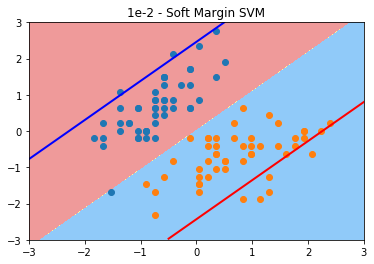

In [183]:
# SVC , C = 1e-2 - Soft Margin SVM 
plot_decision_bounary_softmargin(svc001, axis =[-3,3,-3,3])
plt.scatter(X_standard[y == 0,0],X_standard[y == 0,1])
plt.scatter(X_standard[y == 1,0],X_standard[y == 1,1])
plt.title("1e-2 - Soft Margin SVM")

plt.show()